In [1]:
#import data
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer #needed for VADER
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"

LOCALPATH = './tweets.csv'

#remove unnecessary features
df = pd.read_csv(LOCALPATH, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.drop('ids', inplace=True, axis=1)
df.drop('user', inplace=True, axis=1)
df.drop('date', inplace=True, axis=1)
df.drop('flag', inplace=True, axis=1)

#display a sample to verify data was imported, and features dropped
df.sample(5)

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /Users/amacias2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amacias2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amacias2/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,target,text
174144,0,Just got to work. Only today and three days le...
567873,0,playing harvestmoon (very very very old game) ...
953002,4,92 out of 100? Not bad. Not bad at all
966948,4,@Jamiebower Glad you made it home ok. Have a g...
1241705,4,bored. i need to get in shape


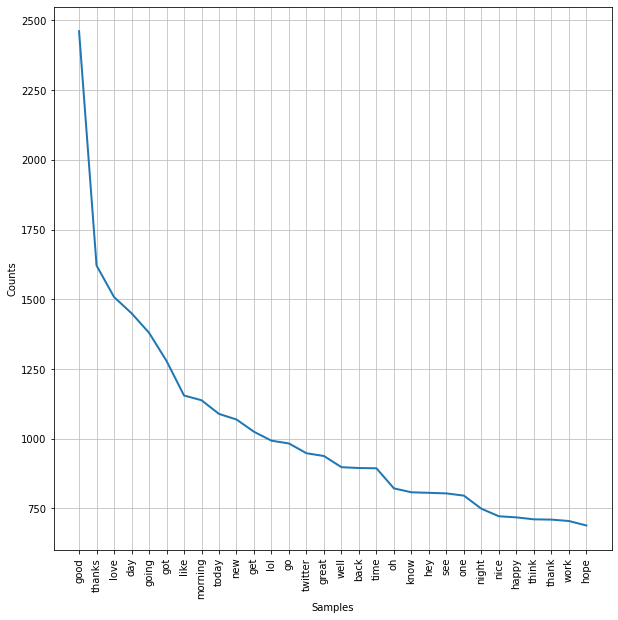

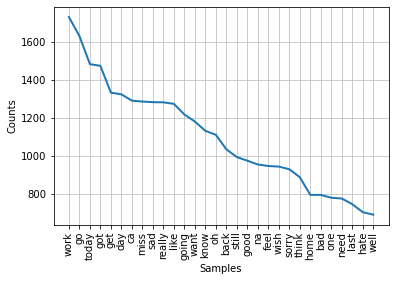

{'getting', 'glad', 'days', 'one', 'first', 'go', 'long', 'need', 'beautiful', 'time', 'follow', 'amazing', 'take', 'get', 'working', 'pretty', 'done', 'hi', 'made', 'home', 'see', 'ready', 'make', 'lol', 'know', 'watching', 'sun', 'guys', 'always', 'nice', 'best', 'come', 'love', 'better', 'wait', 'welcome', 'twitter', 'last', 'looking', 'back', 'wow', 'excited', 'birthday', 'great', 'fun', 'hey', 'look', 'hello', 'haha', 'listening', 'say', 'night', 'yes', 'oh', 'got', 'tomorrow', 'new', 'everyone', 'work', 'ca', 'let', 'tweet', 'happy', 'sounds', 'na', 'going', 'cool', 'yeah', 'much', 'gon', 'ok', 'think', 'awesome', 'finally', 'sleep', 'bed', 'way', 'could', 'morning', 'want', 'tonight', 'really', 'hope', 'ha', 'good', 'still', 'would', 'feel', 'sure', 'thanks', 'people', 'amp', 'day', 'like', 'right', 'yay', 'another', 'today', 'thank', 'well'}
{'getting', 'days', 'poor', 'one', 'damn', 'go', 'long', 'need', 'time', 'already', 'get', 'working', 'sorry', 'bored', 'please', 'home', 

In [255]:
#tweets in our data set are already sorted, with neg tweets in index 1-800000, pos in 800001-end
#collect samples of 50,000 tweets each

neg_tweets = df[750000:800000]
pos_tweets = df[800000:850000]


sample_pos = df[800000:850000].to_numpy()
sample_neg = df[750000:800000].to_numpy()


def clean_text(text):
    #split text into tokens (words) for filtering
    text_tokens = nltk.word_tokenize(text)
    
    #include only words that are made of letters (no non-words with punctuation)
    text_tokens = [w for w in text_tokens if w.isalpha()]
    
    #convert all letters to lowercase to ensure accurate word counting
    text_tokens = [w.lower() for w in text_tokens]
    
    #remove standard stopwords defined by NLTK
    stopwords = nltk.corpus.stopwords.words('english') 
    text_tokens = [w for w in text_tokens if not w in stopwords] 
    
    #remove additional irrelevant words, manually defined by us
    other_stopwords = ['http', 'quot', 'It', 'it', 'Im', 'im', 'th', 'lt']
    text_tokens = [w for w in text_tokens if not w in other_stopwords] 
    
    #remove 1-character words
    text_tokens = [w for w in text_tokens if not len(w) == 1]
    
    return text_tokens

#clean text and return text_tokens
test_pos = pos_tweets['text'].apply(clean_text)


pos_text = pos_tweets['text'].to_string()
pos_tokens = clean_text(pos_text)
pos_fd = nltk.FreqDist(pos_tokens)

neg_text = neg_tweets['text'].to_string()
neg_tokens = clean_text(neg_text)
neg_fd = nltk.FreqDist(neg_tokens)

plt.figure(figsize=(10,10))

pos_fd.plot(30)
neg_fd.plot(30)

# common_words = set(pos_fd).intersection(neg_fd)
#Deleting the words that are in common between each set 
# for word in common_words:
#     del pos_fd[word]
#     del neg_fd[word]

top_100_pos = {word for word, count in pos_fd.most_common(100)}
top_100_neg = {word for word, count in neg_fd.most_common(100)}

print(top_100_pos)
print(top_100_neg)

In [256]:
#using VADER to calculate scores of pos vs neg
from sklearn.utils import shuffle
sia = SentimentIntensityAnalyzer()
# sia.polarity_scores(sample_pos['text'].to_string())
positive_tweets = 0;
test_positive = 0;
test_negative = 0;
def is_positive(sample_pos: str) -> bool:
    return sia.polarity_scores(sample_pos)["compound"] > 0

for tweet1 in sample_pos:
        if(tweet[0] == 4):
            positive_tweets +=1
print("Total positive tweets: " , positive_tweets)

shuffle(sample_pos)
for tweet in sample_pos:
    if( is_positive(tweet[1])):
        test_positive +=1

print("Vader found : ", test_positive, " positive tweets & negative tweets: ", 50000 - test_positive)
print("Vader's accuracy: ",test_positive / 50000)


Total positive tweets:  50000
Vader found :  30905  positive tweets & negative tweets:  19095
Vader's accuracy:  0.6181


In [257]:
from statistics import mean 
def get_features(text):
    features = dict()
    wordcount = 0
    comp_scores = list()
    pos_scores = list()
    
    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_pos:
                wordcount += 1
        comp_scores.append(sia.polarity_scores(sentence)["compound"])
        pos_scores.append(sia.polarity_scores(sentence)["pos"])
        
    #For each text you will get:
    #mean of compound scores
    features["mean_compound"] = mean(comp_scores) 
    #mean of positive score
    features["mean_positive"] = mean(pos_scores)
    #Number of words within the top 100 of positive
    features["wordcount"] = wordcount
    
    return features

features = [
    (get_features(tweet), "pos")
    for tweet in pos_tweets['text']
]
features.extend([
    (get_features(tweet), "neg")
    for tweet in neg_tweets['text']
])

In [258]:
train_count = len(features) - (len(features) // 5)
shuffle(features)t
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)

nltk.classify.accuracy(classifier, features[train_count:])
# print(features[2])
# len(features)
# print(train_count)
# 

Most Informative Features
           mean_compound = -0.2628           neg : pos    =     36.0 : 1.0
           mean_compound = 0.23315           neg : pos    =     29.9 : 1.0
           mean_positive = 0.744             pos : neg    =     27.0 : 1.0
           mean_positive = 0.552             pos : neg    =     24.9 : 1.0
           mean_compound = -0.7351           neg : pos    =     21.5 : 1.0
           mean_compound = -0.2057           neg : pos    =     18.8 : 1.0
           mean_compound = 0.6114            pos : neg    =     18.3 : 1.0
           mean_compound = -0.4767           neg : pos    =     15.4 : 1.0
           mean_compound = 0.4926            pos : neg    =     15.3 : 1.0
           mean_positive = 0.761             pos : neg    =     14.6 : 1.0


0.5381

In [259]:
# features[50000:50100]

In [260]:
# features[1:100]

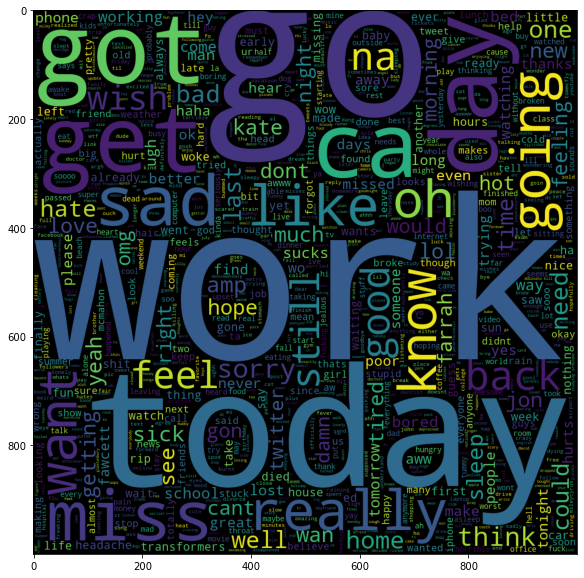

In [261]:
cleaned_neg_wc = WordCloud(max_words=1000, width=1000, height=1000)
cleaned_neg_wc.generate_from_frequencies(neg_fd)

plt.figure(figsize=(10,10))

plt.imshow(cleaned_neg_wc)